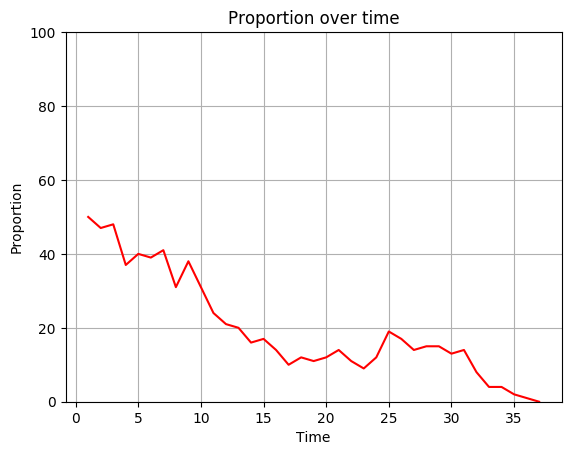

37


LLN_InfTimeAbsorption (generic function with 1 method)

In [20]:
using PyPlot


function nextGeneration(populationSize, proportion)
    """Returns the proportion of the new generation, 
    using the old generation."""
    newProportion = 0
    for i in 1:populationSize
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
        # of parameter "proportion/populationSize"
        if rand() < proportion/populationSize
            newProportion += 1
        end
    end
    return newProportion
end


function trajectory(populationSize, initialProportion, finalTime)
    """Run the Wright-Fisher model algorithm. Return the entire trajectory. 
    Stops when finalTime generations are produced or when an absorbing state is reached.
    finalTime is how many generations you produce.
    """
    
    listOfProportions = Float64[]
    infTimeAbsorption = 0
    
    # Initializing the population
    currentProportion = initialProportion
    
    # First proportion added to the trajectory
    push!(listOfProportions, currentProportion)

    for time in 2:finalTime
        
        currentProportion = nextGeneration(populationSize, currentProportion)
        
        # Getting the time of absorption
        if (currentProportion == 0 || currentProportion == populationSize)
            infTimeAbsorption = time
        end
        
        # Adding the proportion to the trajectory
        push!(listOfProportions, currentProportion)
        
        # Break the loop when an absorbance state is reached
        if (infTimeAbsorption != 0)
            finalTime = time
            break
        end
    end

    # Returns the time of absorption, 0 if there is none, and the entire trajectory.
    return infTimeAbsorption, listOfProportions
end

function plotTrajectory(populationSize, trajectory)
    """Plot a trajectory. populationSize is an argument so that we can fix the zoom."""
    ioff()
    
    listOfTimes = collect(1:length(trajectory))
    
    title("Proportion over time")
    xlabel("Time")
    ylabel("Proportion")
    ylim(0, populationSize)
    grid(true)
    
    plot(listOfTimes, trajectory, color="red")
end

#########################################################################################
# Plot of a trajectory
#########################################################################################
absorptionTime, traj = trajectory(100, 50, 100)
println(absorptionTime)
plotTrajectory(100, traj)

#########################################################################################
# Mean of the Time Absorption using the law of large numbers
#########################################################################################

function LLN_InfTimeAbsorption(numberOfIterations, populationSize, initialProportion, finalTime)
    """Runs the Wright-Fisher Algorithm to simulate the Law of Large Numbers for the minimum time of Absorption.
    numberOfIterations is how many times you run the Wright-Fisher Algorithm"""


    # For the plot
    iterations = collect(1:numberOfIterations)
    # For now it has 2 vectors to access all the informations easily. Only the one storing the
    # arithmetic mean is needed though.
    collectionOfTimeAbsorption = zeros(Float64, numberOfIterations)
    arithmeticMeanTimeAbsorption = zeros(Float64, numberOfIterations)

    # Algorithm

    # Initialization
    res, vector = trajectory(populationSize, initialProportion, finalTime)
    collectionOfTimeAbsorption[1] = res
    arithmeticMeanTimeAbsorption[1] = res

    for i in 2:numberOfIterations
        res, vector = trajectory(populationSize, initialProportion, finalTime)
        collectionOfTimeAbsorption[i] = res
        arithmeticMeanTimeAbsorption[i] = (arithmeticMeanTimeAbsorption[i-1]*(i-1)+res)/i
    end
    
    return arithmeticMeanTimeAbsorption
end

#plotTrajectory(100, LLN_InfTimeAbsorption(2000, 100, 50, 100))